# Predicting the Sale Price of Bulldozers using Machine Learning

In this notebook, we're going to go through an example machine learning project with the goal of predicting the sale price of bulldozers.

## 1. Problem Definition

> How well can we predict the future sale price of a bulldozer, given its characteristics and previous examples of how much similar bulldozers have been sold for?

## 2. Data

The data is downloaded from the Kaggle Bluebook for Bulldozers competition: https://www.kaggle.com/c/bluebook-for-bulldozers/data

There are 3 main datasets:

* Train.csv is the training set, which contains data through the end of 2011.
* Valid.csv is the validation set, which contains data from January 1, 2012 - April 30, 2012 You make predictions on this set throughout the majority of the competition. Your score on this set is used to create the public leaderboard.
* Test.csv is the test set, which won't be released until the last week of the competition. It contains data from May 1, 2012 - November 2012. Your score on the test set determines your final rank for the competition.

## 3. Evaluation

The evaluation metric for this competition is the RMSLE (root mean squared log error) between the actual and predicted auction prices.


For more on the evaluation of this project check: https://www.kaggle.com/c/bluebook-for-bulldozers/overview/evaluation

**Note:** The goal for most regression evaluation metrics is to minimize the error. For example, our goal for this project will be to build a machine learning model which minimises RMSLE.

## 4. Features

Kaggle provides a data dictionary detailing all of the features of the dataset. You can view this data dictionary on Google Sheets:
https://docs.google.com/spreadsheets/d/18ly-bLR8sbDJLITkWG7ozKm8l3RyieQ2Fpgix-beSYI/edit#gid=1021421956

In [1]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Importing Training and Validation sets
df = pd.read_csv("data/bluebook-for-bulldozers/TrainAndValid.csv")
df.head()

C:\Users\Public\anaconda\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (13,39,40,41) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1139246,66000.0,999089,3157,121,3.0,2004,68.0,Low,11/16/2006 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
1,1139248,57000.0,117657,77,121,3.0,1996,4640.0,Low,3/26/2004 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1139249,10000.0,434808,7009,121,3.0,2001,2838.0,High,2/26/2004 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1139251,38500.0,1026470,332,121,3.0,2001,3486.0,High,5/19/2011 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1139253,11000.0,1057373,17311,121,3.0,2007,722.0,Medium,7/23/2009 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
# The warning which we have received is because Pandas tends not to take a lot of RAM space.
# Our dataset is huge so Pandas is throwing a warning that RAM might be consumed more.
# To stop this warning we will set low_memory=False.

df = pd.read_csv("data/bluebook-for-bulldozers/TrainAndValid.csv",
           low_memory=False)
df.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1139246,66000.0,999089,3157,121,3.0,2004,68.0,Low,11/16/2006 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
1,1139248,57000.0,117657,77,121,3.0,1996,4640.0,Low,3/26/2004 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1139249,10000.0,434808,7009,121,3.0,2001,2838.0,High,2/26/2004 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1139251,38500.0,1026470,332,121,3.0,2001,3486.0,High,5/19/2011 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1139253,11000.0,1057373,17311,121,3.0,2007,722.0,Medium,7/23/2009 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
# Now let's get some information about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412698 entries, 0 to 412697
Data columns (total 53 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   SalesID                   412698 non-null  int64  
 1   SalePrice                 412698 non-null  float64
 2   MachineID                 412698 non-null  int64  
 3   ModelID                   412698 non-null  int64  
 4   datasource                412698 non-null  int64  
 5   auctioneerID              392562 non-null  float64
 6   YearMade                  412698 non-null  int64  
 7   MachineHoursCurrentMeter  147504 non-null  float64
 8   UsageBand                 73670 non-null   object 
 9   saledate                  412698 non-null  object 
 10  fiModelDesc               412698 non-null  object 
 11  fiBaseModel               412698 non-null  object 
 12  fiSecondaryDesc           271971 non-null  object 
 13  fiModelSeries             58667 non-null   o

In [5]:
# We will try to check if there are null values since we can see that the count seems to be different for a few columns
df.isna().sum()

SalesID                          0
SalePrice                        0
MachineID                        0
ModelID                          0
datasource                       0
auctioneerID                 20136
YearMade                         0
MachineHoursCurrentMeter    265194
UsageBand                   339028
saledate                         0
fiModelDesc                      0
fiBaseModel                      0
fiSecondaryDesc             140727
fiModelSeries               354031
fiModelDescriptor           337882
ProductSize                 216605
fiProductClassDesc               0
state                            0
ProductGroup                     0
ProductGroupDesc                 0
Drive_System                305611
Enclosure                      334
Forks                       214983
Pad_Type                    331602
Ride_Control                259970
Stick                       331602
Transmission                224691
Turbocharged                331602
Blade_Extension     

In [6]:
# So there are a few columns which have got missing values

In [7]:
df.columns

Index(['SalesID', 'SalePrice', 'MachineID', 'ModelID', 'datasource',
       'auctioneerID', 'YearMade', 'MachineHoursCurrentMeter', 'UsageBand',
       'saledate', 'fiModelDesc', 'fiBaseModel', 'fiSecondaryDesc',
       'fiModelSeries', 'fiModelDescriptor', 'ProductSize',
       'fiProductClassDesc', 'state', 'ProductGroup', 'ProductGroupDesc',
       'Drive_System', 'Enclosure', 'Forks', 'Pad_Type', 'Ride_Control',
       'Stick', 'Transmission', 'Turbocharged', 'Blade_Extension',
       'Blade_Width', 'Enclosure_Type', 'Engine_Horsepower', 'Hydraulics',
       'Pushblock', 'Ripper', 'Scarifier', 'Tip_Control', 'Tire_Size',
       'Coupler', 'Coupler_System', 'Grouser_Tracks', 'Hydraulics_Flow',
       'Track_Type', 'Undercarriage_Pad_Width', 'Stick_Length', 'Thumb',
       'Pattern_Changer', 'Grouser_Type', 'Backhoe_Mounting', 'Blade_Type',
       'Travel_Controls', 'Differential_Type', 'Steering_Controls'],
      dtype='object')

<AxesSubplot:ylabel='Frequency'>

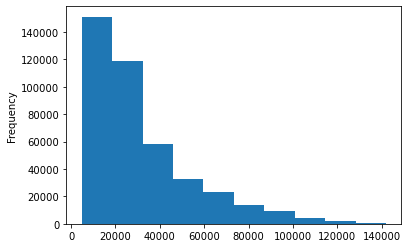

In [8]:
# Let us now try to plot something
# Let's try a distribution plot i.e. a histogram

df.SalePrice.plot.hist()

In [9]:
# So a majority of our bulldozers are sold under 20000
# Pretty much half of the bulldozers are sold under 30000

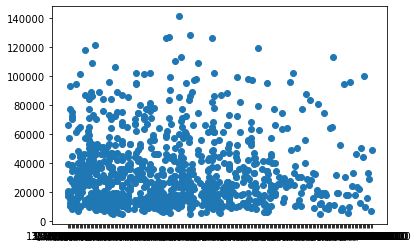

In [10]:
# Now let's try to plot something else
# As this is kind of time series forecasting project -
# let's try to do a scatter plot between sale date amd sale price for first 1000 values

fig, ax = plt.subplots()
ax.scatter(df["saledate"][:1000], df["SalePrice"][:1000])

In [11]:
# We can plot directly using the datafram too but it will not let you limit only first 1000 values
# df.plot.scatter(x="saledate", y="SalePrice")

In [12]:
# Now from the above plot if we check the x axis then the labels aren't understandable either
# That is because the dtype of saledate is an object and not datetime
df.saledate.dtype

dtype('O')

In [13]:
# We need to parse it as datetime value

### Parsing Dates

When we work with time series data, we want to enrich the time & date component as much as possible.

We can do that by telling pandas which of our columns has dates in it using the `parse_dates` parameter.

In [14]:
# Import data again but this time parse dates

df = pd.read_csv("data/bluebook-for-bulldozers/TrainAndValid.csv",
              low_memory=False,
              parse_dates=["saledate"])

In [15]:
df.saledate.dtype

dtype('<M8[ns]')

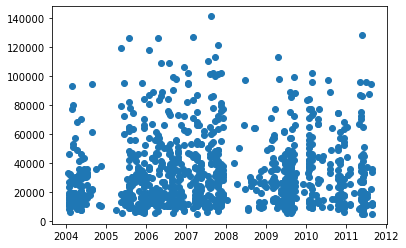

In [16]:
fig, ax = plt.subplots()
ax.scatter(x=df["saledate"][:1000], y=df["SalePrice"][:1000])

In [17]:
# The plot is more clear now that the x axis is plotted correctly based on year as the dtype is Datetime
# We can see that there are a lot of sales around 2006 - 2008 because the data is densely populated
# The highest value a bulldozer was sold in seems in 2007
# There were more sales in mid 2009 - 2010

In [18]:
df.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1139246,66000.0,999089,3157,121,3.0,2004,68.0,Low,2006-11-16,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
1,1139248,57000.0,117657,77,121,3.0,1996,4640.0,Low,2004-03-26,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1139249,10000.0,434808,7009,121,3.0,2001,2838.0,High,2004-02-26,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1139251,38500.0,1026470,332,121,3.0,2001,3486.0,High,2011-05-19,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1139253,11000.0,1057373,17311,121,3.0,2007,722.0,Medium,2009-07-23,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
# Here we are unable to see all the columns. The columns are getting truncated.
# Let's transpose the dataframe to get all the columns
df.head().T

,0,1,2,3,4
SalesID,1139246,1139248,1139249,1139251,1139253
SalePrice,66000.0,57000.0,10000.0,38500.0,11000.0
MachineID,999089,117657,434808,1026470,1057373
ModelID,3157,77,7009,332,17311
datasource,121,121,121,121,121
auctioneerID,3.0,3.0,3.0,3.0,3.0
YearMade,2004,1996,2001,2001,2007
MachineHoursCurrentMeter,68.0,4640.0,2838.0,3486.0,722.0
UsageBand,Low,Low,High,High,Medium
saledate,2006-11-16 00:00:00,2004-03-26 00:00:00,2004-02-26 00:00:00,2011-05-19 00:00:00,2009-07-23 00:00:00


In [20]:
df.saledate.head(20)

0    2006-11-16
1    2004-03-26
2    2004-02-26
3    2011-05-19
4    2009-07-23
5    2008-12-18
6    2004-08-26
7    2005-11-17
8    2009-08-27
9    2007-08-09
10   2008-08-21
11   2006-08-24
12   2005-10-20
13   2006-01-26
14   2006-01-03
15   2006-11-16
16   2007-06-14
17   2010-01-28
18   2006-03-09
19   2005-11-17
Name: saledate, dtype: datetime64[ns]

In [21]:
# We can see the data is not sorted

### Sort DataFrame by saledate

When working with time series data, it's a good idea to sort it by date.

In [22]:
df.sort_values(by="saledate",
              ascending=True,
              inplace=True)

In [23]:
df.saledate.head(20)

205615   1989-01-17
274835   1989-01-31
141296   1989-01-31
212552   1989-01-31
62755    1989-01-31
54653    1989-01-31
81383    1989-01-31
204924   1989-01-31
135376   1989-01-31
113390   1989-01-31
113394   1989-01-31
116419   1989-01-31
32138    1989-01-31
127610   1989-01-31
76171    1989-01-31
127000   1989-01-31
128130   1989-01-31
127626   1989-01-31
55455    1989-01-31
55454    1989-01-31
Name: saledate, dtype: datetime64[ns]

In [24]:
df.head().T

,205615,274835,141296,212552,62755
SalesID,1646770,1821514,1505138,1671174,1329056
SalePrice,9500.0,14000.0,50000.0,16000.0,22000.0
MachineID,1126363,1194089,1473654,1327630,1336053
ModelID,8434,10150,4139,8591,4089
datasource,132,132,132,132,132
auctioneerID,18.0,99.0,99.0,99.0,99.0
YearMade,1974,1980,1978,1980,1984
MachineHoursCurrentMeter,NaN,NaN,NaN,NaN,NaN
UsageBand,NaN,NaN,NaN,NaN,NaN
saledate,1989-01-17 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00


In [25]:
# The dataframe is sorted as per the saledate

### Make a copy of the original DataFrame

We make a copy of the original dataframe so when we manipulate the copy, we've still got our original data.

In [26]:
df_tmp = df.copy()

In [27]:
df_tmp.saledate.head()

205615   1989-01-17
274835   1989-01-31
141296   1989-01-31
212552   1989-01-31
62755    1989-01-31
Name: saledate, dtype: datetime64[ns]

In [28]:
# We will now do Feature Engineering
# We will try to check the features available to us and if we can use them to enrich our data
# Let's target the saledate column for it

### Add datetime paramaeters for `saledate` column

In [29]:
df_tmp.saledate[0]

Timestamp('2006-11-16 00:00:00')

In [30]:
df_tmp.saledate[0].dt.year

AttributeError: 'Timestamp' object has no attribute 'dt'

In [31]:
# Instead of the above mistake, let's try to access the first row and then try to get the saledate for it

In [32]:
df_tmp[:1].saledate

205615   1989-01-17
Name: saledate, dtype: datetime64[ns]

In [33]:
df_tmp[:1].saledate.dt.year

205615    1989
Name: saledate, dtype: int64

In [34]:
df_tmp[:1].saledate.dt.day

205615    17
Name: saledate, dtype: int64

In [35]:
df_tmp[:1].saledate.dt.dayofweek

205615    1
Name: saledate, dtype: int64

In [36]:
df_tmp["saleYear"] = df_tmp.saledate.dt.year
df_tmp["saleMonth"] = df_tmp.saledate.dt.month
df_tmp["saleDay"] = df_tmp.saledate.dt.day
df_tmp["saleDayOfWeek"] = df_tmp.saledate.dt.dayofweek
df_tmp["saleDayOfYear"] = df_tmp.saledate.dt.dayofyear

In [37]:
df_tmp.head().T

,205615,274835,141296,212552,62755
SalesID,1646770,1821514,1505138,1671174,1329056
SalePrice,9500.0,14000.0,50000.0,16000.0,22000.0
MachineID,1126363,1194089,1473654,1327630,1336053
ModelID,8434,10150,4139,8591,4089
datasource,132,132,132,132,132
auctioneerID,18.0,99.0,99.0,99.0,99.0
YearMade,1974,1980,1978,1980,1984
MachineHoursCurrentMeter,NaN,NaN,NaN,NaN,NaN
UsageBand,NaN,NaN,NaN,NaN,NaN
saledate,1989-01-17 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00


In [38]:
# Now we have our new columns related to saledate
# We have enriched our DataFrame with date time features and now we can remove saledate column from df_tmp

df_tmp.drop("saledate", axis=1, inplace=True)

In [39]:
# Exploring a little more
df_tmp.state.value_counts()

Florida           67320
Texas             53110
California        29761
Washington        16222
Georgia           14633
Maryland          13322
Mississippi       13240
Ohio              12369
Illinois          11540
Colorado          11529
New Jersey        11156
North Carolina    10636
Tennessee         10298
Alabama           10292
Pennsylvania      10234
South Carolina     9951
Arizona            9364
New York           8639
Connecticut        8276
Minnesota          7885
Missouri           7178
Nevada             6932
Louisiana          6627
Kentucky           5351
Maine              5096
Indiana            4124
Arkansas           3933
New Mexico         3631
Utah               3046
Unspecified        2801
Wisconsin          2745
New Hampshire      2738
Virginia           2353
Idaho              2025
Oregon             1911
Michigan           1831
Wyoming            1672
Montana            1336
Iowa               1336
Oklahoma           1326
Nebraska            866
West Virginia   

### Convert string to categories

One way we can turn all our data into numbers is by converting them into pandas categories.

We can check the different datatypes compatible with pandas here: https://pandas.pydata.org/pandas-docs/stable/reference/general_utility_functions.html#data-types-related-functionality

In [40]:
df.head().T

,205615,274835,141296,212552,62755
SalesID,1646770,1821514,1505138,1671174,1329056
SalePrice,9500.0,14000.0,50000.0,16000.0,22000.0
MachineID,1126363,1194089,1473654,1327630,1336053
ModelID,8434,10150,4139,8591,4089
datasource,132,132,132,132,132
auctioneerID,18.0,99.0,99.0,99.0,99.0
YearMade,1974,1980,1978,1980,1984
MachineHoursCurrentMeter,NaN,NaN,NaN,NaN,NaN
UsageBand,NaN,NaN,NaN,NaN,NaN
saledate,1989-01-17 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00


In [42]:
df_tmp.dtypes

SalesID                       int64
SalePrice                   float64
MachineID                     int64
ModelID                       int64
datasource                    int64
auctioneerID                float64
YearMade                      int64
MachineHoursCurrentMeter    float64
UsageBand                    object
fiModelDesc                  object
fiBaseModel                  object
fiSecondaryDesc              object
fiModelSeries                object
fiModelDescriptor            object
ProductSize                  object
fiProductClassDesc           object
state                        object
ProductGroup                 object
ProductGroupDesc             object
Drive_System                 object
Enclosure                    object
Forks                        object
Pad_Type                     object
Ride_Control                 object
Stick                        object
Transmission                 object
Turbocharged                 object
Blade_Extension             

In [43]:
# We are checking if the column is of a certain data type
pd.api.types.is_string_dtype(df_tmp["UsageBand"])

True

In [44]:
# We will now create a for loop to convert all the columns which have data type as string/object into category
for label, content in df_tmp.items():
    if pd.api.types.is_string_dtype(content):
        df_tmp[label] = content.astype("category").cat.as_ordered()       

In [45]:
# In the above cell - we have tried afor loop to iter through all the columns and its content in the dataframe
# If the content is of string/object type then we need to convert it to category
# We are converting the content datatype to category and it is done as ordered

In [46]:
# Let's verify the datatypes now
df_tmp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 412698 entries, 205615 to 409203
Data columns (total 57 columns):
 #   Column                    Non-Null Count   Dtype   
---  ------                    --------------   -----   
 0   SalesID                   412698 non-null  int64   
 1   SalePrice                 412698 non-null  float64 
 2   MachineID                 412698 non-null  int64   
 3   ModelID                   412698 non-null  int64   
 4   datasource                412698 non-null  int64   
 5   auctioneerID              392562 non-null  float64 
 6   YearMade                  412698 non-null  int64   
 7   MachineHoursCurrentMeter  147504 non-null  float64 
 8   UsageBand                 73670 non-null   category
 9   fiModelDesc               412698 non-null  category
 10  fiBaseModel               412698 non-null  category
 11  fiSecondaryDesc           271971 non-null  category
 12  fiModelSeries             58667 non-null   category
 13  fiModelDescriptor       

In [47]:
# We will now check one of the columns
df_tmp.state.cat.categories

Index(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado',
       'Connecticut', 'Delaware', 'Florida', 'Georgia', 'Hawaii', 'Idaho',
       'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana',
       'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota',
       'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada',
       'New Hampshire', 'New Jersey', 'New Mexico', 'New York',
       'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon',
       'Pennsylvania', 'Puerto Rico', 'Rhode Island', 'South Carolina',
       'South Dakota', 'Tennessee', 'Texas', 'Unspecified', 'Utah', 'Vermont',
       'Virginia', 'Washington', 'Washington DC', 'West Virginia', 'Wisconsin',
       'Wyoming'],
      dtype='object')

In [48]:
# As they are ordered we can see that the states are ordered here
# We can check these categories and their values using cat.categories

In [49]:
# Let us check the codes which will be used under the hood when converting these categories
df_tmp.state.cat.codes

205615    43
274835     8
141296     8
212552     8
62755      8
          ..
410879     4
412476     4
411927     4
407124     4
409203     4
Length: 412698, dtype: int8

In [50]:
# So, under the hood they are assigned certain numerical value and we can refer to these codes
# as well as original categorical values

Thanks to Pandas Categories we now have a way to access all of our data in the form of numbers.

But we still have a bunch of missing data...

In [51]:
# Let's check how much data are we missing in the ratio when compared with total data
df_tmp.isna().sum()/len(df_tmp)

SalesID                     0.000000
SalePrice                   0.000000
MachineID                   0.000000
ModelID                     0.000000
datasource                  0.000000
auctioneerID                0.048791
YearMade                    0.000000
MachineHoursCurrentMeter    0.642586
UsageBand                   0.821492
fiModelDesc                 0.000000
fiBaseModel                 0.000000
fiSecondaryDesc             0.340993
fiModelSeries               0.857845
fiModelDescriptor           0.818715
ProductSize                 0.524851
fiProductClassDesc          0.000000
state                       0.000000
ProductGroup                0.000000
ProductGroupDesc            0.000000
Drive_System                0.740520
Enclosure                   0.000809
Forks                       0.520921
Pad_Type                    0.803498
Ride_Control                0.629928
Stick                       0.803498
Transmission                0.544444
Turbocharged                0.803498
B

## Filling missing values

### Filling missing numeric values first

In [52]:
# Let's print the name of the columns which have numeric datatype
for label, content in df_tmp.items():
    if pd.api.types.is_numeric_dtype(content):
        print(label)

SalesID
SalePrice
MachineID
ModelID
datasource
auctioneerID
YearMade
MachineHoursCurrentMeter
saleYear
saleMonth
saleDay
saleDayOfWeek
saleDayOfYear


In [53]:
df_tmp.ModelID

205615     8434
274835    10150
141296     4139
212552     8591
62755      4089
          ...  
410879     5266
412476    19330
411927    17244
407124     3357
409203     4701
Name: ModelID, Length: 412698, dtype: int64

In [54]:
# Check for which numeric columns have null values
for label, content in df_tmp.items():
    if pd.api.types.is_numeric_dtype(content):
        if df_tmp[label].isna().sum():
            print(label)

auctioneerID
MachineHoursCurrentMeter


In [55]:
# Fill numeric rows with the median
# But before that we will create another column which will have boolean values if the value was missing
# And for that particular row - the column value has been filled
for label, content in df_tmp.items():
    if pd.api.types.is_numeric_dtype(content):
        # If it is numeric and has got any null values
        if pd.isnull(content).sum():
            # Add a binary column which tells us if the data was missing or not. False added if missing value.
            df_tmp[label+"_is_missing"] = pd.isnull(content)
            # Fill missing numeric values with median
            df_tmp[label] = content.fillna(content.median())

In [56]:
# Now let's check if the true and false values match with the is missing column values
df_tmp["auctioneerID_is_missing"].value_counts()

False    392562
True      20136
Name: auctioneerID_is_missing, dtype: int64

In [57]:
# We can confirm the values are filled correctly

In [58]:
df_tmp.isna().sum()

SalesID                                     0
SalePrice                                   0
MachineID                                   0
ModelID                                     0
datasource                                  0
auctioneerID                                0
YearMade                                    0
MachineHoursCurrentMeter                    0
UsageBand                              339028
fiModelDesc                                 0
fiBaseModel                                 0
fiSecondaryDesc                        140727
fiModelSeries                          354031
fiModelDescriptor                      337882
ProductSize                            216605
fiProductClassDesc                          0
state                                       0
ProductGroup                                0
ProductGroupDesc                            0
Drive_System                           305611
Enclosure                                 334
Forks                             

### Filling and turning categorical variables into numbers

In [59]:
# Check for columns which are not numeric
for label, content in df_tmp.items():
    if not pd.api.types.is_numeric_dtype(content):
        print(label)

UsageBand
fiModelDesc
fiBaseModel
fiSecondaryDesc
fiModelSeries
fiModelDescriptor
ProductSize
fiProductClassDesc
state
ProductGroup
ProductGroupDesc
Drive_System
Enclosure
Forks
Pad_Type
Ride_Control
Stick
Transmission
Turbocharged
Blade_Extension
Blade_Width
Enclosure_Type
Engine_Horsepower
Hydraulics
Pushblock
Ripper
Scarifier
Tip_Control
Tire_Size
Coupler
Coupler_System
Grouser_Tracks
Hydraulics_Flow
Track_Type
Undercarriage_Pad_Width
Stick_Length
Thumb
Pattern_Changer
Grouser_Type
Backhoe_Mounting
Blade_Type
Travel_Controls
Differential_Type
Steering_Controls


In [60]:
# Let's check one categorical column and check the codes it has
pd.Categorical(df_tmp.UsageBand).codes

array([-1, -1, -1, ..., -1, -1, -1], dtype=int8)

In [61]:
# The -1 indicates null values
df_tmp["UsageBand"].head()

205615    NaN
274835    NaN
141296    NaN
212552    NaN
62755     NaN
Name: UsageBand, dtype: category
Categories (3, object): ['High' < 'Low' < 'Medium']

In [62]:
# So, when we will try to fill these null values - we will replace the -1 with 0
# Or more like add 1 to all the codes - it is harmless but we can at least eliminate -1

In [63]:
# Turn categorical variables into numbers and fill missing
for label, content in df_tmp.items():
    if not pd.api.types.is_numeric_dtype(content):
        # Add binary column to indicate whether sample had missing value
        df_tmp[label+"_is_missing"] = pd.isnull(content)
        # Turn categories into numbers and add +1
        df_tmp[label] = pd.Categorical(content).codes+1

In [64]:
df_tmp.isna().sum()

SalesID                         0
SalePrice                       0
MachineID                       0
ModelID                         0
datasource                      0
                               ..
Backhoe_Mounting_is_missing     0
Blade_Type_is_missing           0
Travel_Controls_is_missing      0
Differential_Type_is_missing    0
Steering_Controls_is_missing    0
Length: 103, dtype: int64

In [65]:
# We have all the missing values filled now
# The data has been preprocessed

In [66]:
# Let's export it as a file now. Keep a good practice to save the file once you have preprocessed.
df_tmp.to_csv("data/bluebook-for-bulldozers/Training_data_preprocessed.csv", index=[0])

In [ ]:
# Let's import our preprocessed dataset

In [67]:
df_tmp = pd.read_csv("data/bluebook-for-bulldozers/Training_data_preprocessed.csv")
df_tmp.head()

,Unnamed: 0,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,...,Undercarriage_Pad_Width_is_missing,Stick_Length_is_missing,Thumb_is_missing,Pattern_Changer_is_missing,Grouser_Type_is_missing,Backhoe_Mounting_is_missing,Blade_Type_is_missing,Travel_Controls_is_missing,Differential_Type_is_missing,Steering_Controls_is_missing
0,205615,1646770,9500.0,1126363,8434,132,18.0,1974,0.0,0,...,True,True,True,True,True,False,False,False,True,True
1,274835,1821514,14000.0,1194089,10150,132,99.0,1980,0.0,0,...,True,True,True,True,True,True,True,True,False,False
2,141296,1505138,50000.0,1473654,4139,132,99.0,1978,0.0,0,...,True,True,True,True,True,False,False,False,True,True
3,212552,1671174,16000.0,1327630,8591,132,99.0,1980,0.0,0,...,True,True,True,True,True,True,True,True,False,False
4,62755,1329056,22000.0,1336053,4089,132,99.0,1984,0.0,0,...,True,True,True,True,True,False,False,False,True,True


In [71]:
df_tmp.isna().sum()

Unnamed: 0                      0
SalesID                         0
SalePrice                       0
MachineID                       0
ModelID                         0
                               ..
Backhoe_Mounting_is_missing     0
Blade_Type_is_missing           0
Travel_Controls_is_missing      0
Differential_Type_is_missing    0
Steering_Controls_is_missing    0
Length: 104, dtype: int64

In [72]:
df_tmp.dtypes

Unnamed: 0                        int64
SalesID                           int64
SalePrice                       float64
MachineID                         int64
ModelID                           int64
                                 ...   
Backhoe_Mounting_is_missing        bool
Blade_Type_is_missing              bool
Travel_Controls_is_missing         bool
Differential_Type_is_missing       bool
Steering_Controls_is_missing       bool
Length: 104, dtype: object

In [73]:
df_tmp.info

<bound method DataFrame.info of         Unnamed: 0  SalesID  SalePrice  MachineID  ModelID  datasource  \
0           205615  1646770     9500.0    1126363     8434         132   
1           274835  1821514    14000.0    1194089    10150         132   
2           141296  1505138    50000.0    1473654     4139         132   
3           212552  1671174    16000.0    1327630     8591         132   
4            62755  1329056    22000.0    1336053     4089         132   
...            ...      ...        ...        ...      ...         ...   
412693      410879  6302984    16000.0    1915521     5266         149   
412694      412476  6324811     6000.0    1919104    19330         149   
412695      411927  6313029    16000.0    1918416    17244         149   
412696      407124  6266251    55000.0     509560     3357         149   
412697      409203  6283635    34000.0    1869284     4701         149   

        auctioneerID  YearMade  MachineHoursCurrentMeter  UsageBand  ...  \
0  

Now that all of our data is numeric as well as our dataframe has no missing values, we should be able to build a machine learning model.

In [75]:
%%time

from sklearn.ensemble import RandomForestRegressor

# Instantiate the model
model = RandomForestRegressor(n_jobs=-1,
                             random_state=42)

# n_jobs =-1 means use all the computer's processing power
# random_state=42 is equivalent to np.random.seed(42) so we can have reproducible results

# Fit the model
model.fit(df_tmp.drop("SalePrice", axis=1), df_tmp["SalePrice"])

Wall time: 6min 3s


RandomForestRegressor(n_jobs=-1, random_state=42)

In [76]:
# Let's try to score our model on the training data itself
model.score(df_tmp.drop("SalePrice", axis=1), df_tmp["SalePrice"])

0.9875334216094208

### Splitting data into train/validation sets

In [100]:
df_tmp.saleYear

0         1989
1         1989
2         1989
3         1989
4         1989
          ... 
412693    2012
412694    2012
412695    2012
412696    2012
412697    2012
Name: saleYear, Length: 412698, dtype: int64

In [101]:
df_tmp.saleYear.value_counts()

2009    43849
2008    39767
2011    35197
2010    33390
2007    32208
2006    21685
2005    20463
2004    19879
2001    17594
2000    17415
2002    17246
2003    15254
1998    13046
1999    12793
2012    11573
1997     9785
1996     8829
1995     8530
1994     7929
1993     6303
1992     5519
1991     5109
1989     4806
1990     4529
Name: saleYear, dtype: int64

In [102]:
# Splitting data into train and validation set as mentioned in the Kaggle
df_val = df_tmp[df_tmp["saleYear"]==2012]
df_train = df_tmp[df_tmp["saleYear"]!=2012]

len(df_val), len(df_train)

(11573, 401125)

In [103]:
# Split the data into X and y
X_train, y_train = df_train.drop("SalePrice", axis=1), df_train["SalePrice"]
X_valid, y_valid = df_val.drop("SalePrice", axis=1), df_val["SalePrice"]

X_train.shape, y_train.shape, X_valid.shape, y_valid.shape

((401125, 102), (401125,), (11573, 102), (11573,))

 ### Building the evaluation function

In [126]:
# Our model will be evaluated on RMSLE(Root Mean Squared Log Error) as per Kaggle
# So we will build our evaluation function

from sklearn.metrics import mean_squared_log_error, mean_absolute_error, r2_score

def rmsle(y_test, y_preds):
    """
    Calculates root mean squared log error between predictions and true labels.
    """
    return np.sqrt(mean_squared_log_error(y_test, y_preds))

# Create function to evaluate model on a few different levels
def show_scores(model):
    train_preds = model.predict(X_train)
    val_preds = model.predict(X_valid)
    scores = {"Training MAE" : mean_absolute_error(y_train, train_preds),
             "Valid MAE" : mean_absolute_error(y_valid, val_preds),
             "Training RMSLE" : rmsle(y_train, train_preds),
             "Valid RMSLE" : rmsle(y_valid, val_preds),
             "Training R^2" : r2_score(y_train, train_preds),
             "Valid R^2" : r2_score(y_valid, val_preds)}
    return scores

### Testing our model on a subset (to tune the hyperparameters)

In [108]:
# # This takes far too long... for experimenting

# %%time
# model = RandomeForestRegressor(n_jobs=-1,
#                               random_state=42)

# model.fit(X_train, y_train)

In [109]:
len(X_train)

401125

In [110]:
# So, we will try to find a way to reduce the data

# model.fit(X_train[:10000], y_train[:10000])

In [113]:
# Let's see if there is any way by which we can reduce the data just for experimentation

model = RandomForestRegressor(n_jobs=-1,
                             random_state=42)

model.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': -1,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

In [118]:
# n_estimators are 100 which means there are 100 Random Forests
# max_samples None means all the data is going to go through all the 100 Random Forests i.e.
X_train.shape[0]*100

40112500

In [119]:
# Let's try to limit the training data which will go through the 100 Random Forests
10000*100

1000000

In [120]:
(X_train.shape[0]*100)/1000000

40.1125

In [121]:
# It will be 40 times less data so our computer will process it faster

In [122]:
%%time

# Cutting down on the max number of samples each estimator can see

model = RandomForestRegressor(n_jobs=-1,
                             random_state=42,
                             max_samples=10000)
model.fit(X_train, y_train)

Wall time: 2min 48s


RandomForestRegressor(max_samples=10000, n_jobs=-1, random_state=42)

In [127]:
# Let's score our model
show_scores(model)

{'Training MAE': 5561.2988092240585,
 'Valid MAE': 7177.26365505919,
 'Training RMSLE': 0.257745378256977,
 'Valid RMSLE': 0.29362638671089003,
 'Training R^2': 0.8606658995199189,
 'Valid R^2': 0.8320374995090507}

### Hyperparameter tuning with RandomizedSearchCV

In [134]:
%%time

from sklearn.model_selection import RandomizedSearchCV

# Different RandomForestRegressor hyperparameters
rf_grid = {"n_estimators" : np.arange(10, 100, 10),
          "max_depth" : [None, 3, 5, 10],
          "min_samples_split" : np.arange(2, 20, 2),
          "min_samples_leaf" : np.arange(1, 20, 2),
          "max_features" : [0.5, 1, "sqrt", "auto"],
          "max_samples" : [10000]}

# Instantiate RandomizedSearchCV model
rs_model = RandomizedSearchCV(RandomForestRegressor(n_jobs=-1,
                                                   random_state=42),
                              param_distributions=rf_grid,
                              n_iter=2,
                              cv=5,
                              verbose=True)

# Fit the RandomizedSerachCV
rs_model.fit(X_train, y_train)

Fitting 5 folds for each of 2 candidates, totalling 10 fits
Wall time: 1min 10s


RandomizedSearchCV(cv=5,
                   estimator=RandomForestRegressor(n_jobs=-1, random_state=42),
                   n_iter=2,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'max_features': [0.5, 1, 'sqrt',
                                                         'auto'],
                                        'max_samples': [10000],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([10, 20, 30, 40, 50, 60, 70, 80, 90])},
                   verbose=True)

In [135]:
rs_model.best_params_

{'n_estimators': 50,
 'min_samples_split': 10,
 'min_samples_leaf': 3,
 'max_samples': 10000,
 'max_features': 'sqrt',
 'max_depth': None}

In [136]:
# Evaluate the RandomizedSerachCV model
show_scores(rs_model)

{'Training MAE': 7480.637884638536,
 'Valid MAE': 9004.273896625129,
 'Training RMSLE': 0.3316155546618921,
 'Valid RMSLE': 0.3661753505704015,
 'Training R^2': 0.7653463079876689,
 'Valid R^2': 0.7595579186020288}

In [137]:
# The scores have actually worsened. So, maybe we will try other hyperparamaters

### Train a model with the best hyperparameters

**Note:** These were found after 100 iterations of `RandomizedSearchCV`.

In [138]:
%%time

# Most ideal parameters
ideal_model = RandomForestRegressor(n_estimators=40,
                                   min_samples_leaf=1,
                                   min_samples_split=14,
                                   max_features=0.5,
                                   n_jobs=-1,
                                   max_samples=None,
                                   random_state=42)

# Fit the model
ideal_model.fit(X_train, y_train)

Wall time: 3min 40s


RandomForestRegressor(max_features=0.5, min_samples_split=14, n_estimators=40,
                      n_jobs=-1)

In [140]:
show_scores(ideal_model)

{'Training MAE': 2955.504828794506,
 'Valid MAE': 5971.177560792142,
 'Training RMSLE': 0.14456254724892575,
 'Valid RMSLE': 0.24593534465634684,
 'Training R^2': 0.9588461281243211,
 'Valid R^2': 0.8811945750853556}

In [141]:
show_scores(rs_model)

{'Training MAE': 7480.637884638534,
 'Valid MAE': 9004.27389662513,
 'Training RMSLE': 0.3316155546618921,
 'Valid RMSLE': 0.3661753505704015,
 'Training R^2': 0.7653463079876689,
 'Valid R^2': 0.7595579186020288}

### Make predictions on Test Data

In [180]:
# Import the test data
df_test = pd.read_csv("data/bluebook-for-bulldozers/Test.csv",
                     low_memory=False,
                     parse_dates=["saledate"])
df_test.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,fiModelDesc,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1227829,1006309,3168,121,3,1999,3688.0,Low,2012-05-03,580G,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1227844,1022817,7271,121,3,1000,28555.0,High,2012-05-10,936,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1227847,1031560,22805,121,3,2004,6038.0,Medium,2012-05-10,EC210BLC,...,None or Unspecified,"9' 6""",Manual,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
3,1227848,56204,1269,121,3,2006,8940.0,High,2012-05-10,330CL,...,None or Unspecified,None or Unspecified,Manual,Yes,Triple,NaN,NaN,NaN,NaN,NaN
4,1227863,1053887,22312,121,3,2005,2286.0,Low,2012-05-10,650K,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,PAT,None or Unspecified,NaN,NaN


In [181]:
# Let's predictwith our trained model
test_preds = ideal_model.predict(df_test)

ValueError: could not convert string to float: 'Low'

In [182]:
# We have got the above error because our test data is not preprocessed
# The data is not numerical and categorical
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12457 entries, 0 to 12456
Data columns (total 52 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   SalesID                   12457 non-null  int64         
 1   MachineID                 12457 non-null  int64         
 2   ModelID                   12457 non-null  int64         
 3   datasource                12457 non-null  int64         
 4   auctioneerID              12457 non-null  int64         
 5   YearMade                  12457 non-null  int64         
 6   MachineHoursCurrentMeter  2129 non-null   float64       
 7   UsageBand                 1834 non-null   object        
 8   saledate                  12457 non-null  datetime64[ns]
 9   fiModelDesc               12457 non-null  object        
 10  fiBaseModel               12457 non-null  object        
 11  fiSecondaryDesc           8482 non-null   object        
 12  fiModelSeries     

In [183]:
# The test data has got missing data too
df_test.isna().sum()

SalesID                         0
MachineID                       0
ModelID                         0
datasource                      0
auctioneerID                    0
YearMade                        0
MachineHoursCurrentMeter    10328
UsageBand                   10623
saledate                        0
fiModelDesc                     0
fiBaseModel                     0
fiSecondaryDesc              3975
fiModelSeries               10451
fiModelDescriptor            9433
ProductSize                  6409
fiProductClassDesc              0
state                           0
ProductGroup                    0
ProductGroupDesc                0
Drive_System                 9698
Enclosure                       2
Forks                        6149
Pad_Type                    10349
Ride_Control                 8216
Stick                       10349
Transmission                 7639
Turbocharged                10349
Blade_Extension             11806
Blade_Width                 11806
Enclosure_Type

In [184]:
# The number of columns are also less
df_test.columns

Index(['SalesID', 'MachineID', 'ModelID', 'datasource', 'auctioneerID',
       'YearMade', 'MachineHoursCurrentMeter', 'UsageBand', 'saledate',
       'fiModelDesc', 'fiBaseModel', 'fiSecondaryDesc', 'fiModelSeries',
       'fiModelDescriptor', 'ProductSize', 'fiProductClassDesc', 'state',
       'ProductGroup', 'ProductGroupDesc', 'Drive_System', 'Enclosure',
       'Forks', 'Pad_Type', 'Ride_Control', 'Stick', 'Transmission',
       'Turbocharged', 'Blade_Extension', 'Blade_Width', 'Enclosure_Type',
       'Engine_Horsepower', 'Hydraulics', 'Pushblock', 'Ripper', 'Scarifier',
       'Tip_Control', 'Tire_Size', 'Coupler', 'Coupler_System',
       'Grouser_Tracks', 'Hydraulics_Flow', 'Track_Type',
       'Undercarriage_Pad_Width', 'Stick_Length', 'Thumb', 'Pattern_Changer',
       'Grouser_Type', 'Backhoe_Mounting', 'Blade_Type', 'Travel_Controls',
       'Differential_Type', 'Steering_Controls'],
      dtype='object')

In [185]:
df_tmp.columns

Index(['SalesID', 'SalePrice', 'MachineID', 'ModelID', 'datasource',
       'auctioneerID', 'YearMade', 'MachineHoursCurrentMeter', 'UsageBand',
       'fiModelDesc',
       ...
       'Undercarriage_Pad_Width_is_missing', 'Stick_Length_is_missing',
       'Thumb_is_missing', 'Pattern_Changer_is_missing',
       'Grouser_Type_is_missing', 'Backhoe_Mounting_is_missing',
       'Blade_Type_is_missing', 'Travel_Controls_is_missing',
       'Differential_Type_is_missing', 'Steering_Controls_is_missing'],
      dtype='object', length=103)

### Preprocessing the data (getting the test datatset in the same format as our training dataset)

In [186]:
def preprocess_df(df):
    """
    Performs transformations on df and returns trasnformed df.
    """
    df["saleYear"] = df.saledate.dt.year
    df["saleMonth"] = df.saledate.dt.month
    df["saleDay"] = df.saledate.dt.day
    df["saleDayOfWeek"] = df.saledate.dt.dayofweek
    df["saleDayOfYear"] = df.saledate.dt.dayofyear
    df.drop("saledate", axis=1, inplace=True)
    
    # Fill the numeric rows with median
    for label, content in df.items():
        if pd.api.types.is_numeric_dtype(content):
            # If it is numeric and has got any null values
            if pd.isnull(content).sum():
                # Add a binary column which tells us if the data was missing or not. False added if missing value.
                df[label+"_is_missing"] = pd.isnull(content)
                # Fill missing numeric values with median
                df[label] = content.fillna(content.median())
            
            # Fill categorical missing data and turn categories into numbers
        if not pd.api.types.is_numeric_dtype(content):
            df[label+"_is_missing"] = pd.isnull(content)
            # We add +1 to the catrgory code because pandas encodes missing values as -1
#             df[label] = content.astype("category").cat.as_ordered()
            df[label] = pd.Categorical(content).codes+1

#                 df[label] = pd.Categorical(content).codes+1
            
    return df

In [187]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12457 entries, 0 to 12456
Data columns (total 52 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   SalesID                   12457 non-null  int64         
 1   MachineID                 12457 non-null  int64         
 2   ModelID                   12457 non-null  int64         
 3   datasource                12457 non-null  int64         
 4   auctioneerID              12457 non-null  int64         
 5   YearMade                  12457 non-null  int64         
 6   MachineHoursCurrentMeter  2129 non-null   float64       
 7   UsageBand                 1834 non-null   object        
 8   saledate                  12457 non-null  datetime64[ns]
 9   fiModelDesc               12457 non-null  object        
 10  fiBaseModel               12457 non-null  object        
 11  fiSecondaryDesc           8482 non-null   object        
 12  fiModelSeries     

In [188]:
# Let's preprocessthe test dataframe
df_test = preprocess_df(df_test)
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12457 entries, 0 to 12456
Columns: 101 entries, SalesID to Steering_Controls_is_missing
dtypes: bool(45), float64(1), int16(2), int64(11), int8(42)
memory usage: 2.2 MB


In [191]:
df_test.dtypes

SalesID                         int64
MachineID                       int64
ModelID                         int64
datasource                      int64
auctioneerID                    int64
                                ...  
Backhoe_Mounting_is_missing      bool
Blade_Type_is_missing            bool
Travel_Controls_is_missing       bool
Differential_Type_is_missing     bool
Steering_Controls_is_missing     bool
Length: 101, dtype: object

In [195]:
 test_preds = ideal_model.predict(df_test)

ValueError: X has 101 features, but DecisionTreeRegressor is expecting 102 features as input.

In [196]:
# We have got above error because there seems to be one column less in our test dataset
df_test.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,...,Undercarriage_Pad_Width_is_missing,Stick_Length_is_missing,Thumb_is_missing,Pattern_Changer_is_missing,Grouser_Type_is_missing,Backhoe_Mounting_is_missing,Blade_Type_is_missing,Travel_Controls_is_missing,Differential_Type_is_missing,Steering_Controls_is_missing
0,1227829,1006309,3168,121,3,1999,3688.0,2,499,180,...,True,True,True,True,True,True,True,True,True,True
1,1227844,1022817,7271,121,3,1000,28555.0,1,831,292,...,True,True,True,True,True,True,True,True,False,False
2,1227847,1031560,22805,121,3,2004,6038.0,3,1177,404,...,False,False,False,False,False,True,True,True,True,True
3,1227848,56204,1269,121,3,2006,8940.0,1,287,113,...,False,False,False,False,False,True,True,True,True,True
4,1227863,1053887,22312,121,3,2005,2286.0,2,566,196,...,True,True,True,True,True,False,False,False,True,True


In [197]:
df_tmp.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,...,Undercarriage_Pad_Width_is_missing,Stick_Length_is_missing,Thumb_is_missing,Pattern_Changer_is_missing,Grouser_Type_is_missing,Backhoe_Mounting_is_missing,Blade_Type_is_missing,Travel_Controls_is_missing,Differential_Type_is_missing,Steering_Controls_is_missing
0,1646770,9500.0,1126363,8434,132,18.0,1974,0.0,0,4593,...,True,True,True,True,True,False,False,False,True,True
1,1821514,14000.0,1194089,10150,132,99.0,1980,0.0,0,1820,...,True,True,True,True,True,True,True,True,False,False
2,1505138,50000.0,1473654,4139,132,99.0,1978,0.0,0,2348,...,True,True,True,True,True,False,False,False,True,True
3,1671174,16000.0,1327630,8591,132,99.0,1980,0.0,0,1819,...,True,True,True,True,True,True,True,True,False,False
4,1329056,22000.0,1336053,4089,132,99.0,1984,0.0,0,2119,...,True,True,True,True,True,False,False,False,True,True


In [198]:
# Let's try to check which column is missing using sets
set(df_tmp) - set(df_test)

{'SalePrice', 'auctioneerID_is_missing'}

In [200]:
# SalePrice missing is fine since we will be predicting that column
# auctioneerID_is_missing column is in df_tmp and not in df_test because 
# in test data there wasn't any missing value for auctioneerID column
# Let's create column auctioneerID_is_missing in df_test and fill the column with "False" since no value missing in df_test
df_test["auctioneerID_is_missing"] = False

In [201]:
df_test.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,...,Stick_Length_is_missing,Thumb_is_missing,Pattern_Changer_is_missing,Grouser_Type_is_missing,Backhoe_Mounting_is_missing,Blade_Type_is_missing,Travel_Controls_is_missing,Differential_Type_is_missing,Steering_Controls_is_missing,auctioneerID_is_missing
0,1227829,1006309,3168,121,3,1999,3688.0,2,499,180,...,True,True,True,True,True,True,True,True,True,False
1,1227844,1022817,7271,121,3,1000,28555.0,1,831,292,...,True,True,True,True,True,True,True,False,False,False
2,1227847,1031560,22805,121,3,2004,6038.0,3,1177,404,...,False,False,False,False,True,True,True,True,True,False
3,1227848,56204,1269,121,3,2006,8940.0,1,287,113,...,False,False,False,False,True,True,True,True,True,False
4,1227863,1053887,22312,121,3,2005,2286.0,2,566,196,...,True,True,True,True,False,False,False,True,True,False


In [202]:
test_preds = ideal_model.predict(df_test)

In [204]:
test_preds

array([19329.34632264, 20585.85480698, 48291.7161703 , ...,
       13735.21266337, 21803.98513209, 31079.79825349])

We've made some predictions but they're not in the same format as Kaggle is asking for:
https://www.kaggle.com/competitions/bluebook-for-bulldozers/overview/evaluation

In [207]:
# Format predictions into the same format Kaggle is after
df_preds = pd.DataFrame()
df_preds["SalesID"] = df_test["SalesID"]
df_preds["SalePrice"] = test_preds

In [208]:
df_preds.head()

,SalesID,SalePrice
0,1227829,19329.346323
1,1227844,20585.854807
2,1227847,48291.716170
3,1227848,68899.934765
4,1227863,43689.113185


In [209]:
# Export prediction data
df_preds.to_csv("data/bluebook-for-bulldozers/test_predictions.csv", index=False)

### Feature Importance

Feature Importance seeks to figure out which different attributes of the data were most importance when it comes to predicting the **target variable** (SalePrice).

In [210]:
# Find feature importance of our ideal model
ideal_model.feature_importances_

array([3.29204500e-02, 1.76590219e-02, 4.46695067e-02, 1.85198129e-03,
       3.32916578e-03, 2.04142673e-01, 3.16301946e-03, 1.02666314e-03,
       3.96210098e-02, 4.56710443e-02, 6.40434511e-02, 4.23727159e-03,
       2.02774405e-02, 1.66996743e-01, 4.43060331e-02, 5.91877350e-03,
       2.11369996e-03, 5.14579425e-03, 3.63581189e-03, 6.38543458e-02,
       6.26831635e-04, 1.99714709e-04, 7.23916315e-04, 2.43610801e-04,
       1.45715958e-03, 2.46231611e-05, 1.04929720e-04, 8.56823891e-03,
       8.07089717e-04, 1.63524772e-04, 3.15141740e-03, 6.20679979e-03,
       3.82420782e-03, 1.89348825e-03, 4.13071103e-03, 5.69445574e-03,
       7.33444685e-04, 1.36186982e-02, 1.57353846e-03, 1.77751863e-03,
       3.42669773e-04, 9.43315131e-04, 9.46987645e-04, 5.66229633e-04,
       5.78438217e-04, 4.05633200e-04, 3.52326988e-04, 2.37633995e-03,
       9.35372236e-04, 2.41406938e-04, 2.02428464e-04, 7.40873120e-02,
       3.72591356e-03, 5.67294032e-03, 2.91562392e-03, 9.89225798e-03,
      

In [211]:
len(ideal_model.feature_importances_)

102

In [213]:
len(X_train.columns)

102

In [219]:
# We can now create a dictionary which will map each feature to the importznce value
feature_importances_dict = dict(zip(X_train.columns, ideal_model.feature_importances_))

In [220]:
feature_importances_dict

{'SalesID': 0.032920449988562445,
 'MachineID': 0.017659021907803534,
 'ModelID': 0.04466950670502155,
 'datasource': 0.0018519812903038768,
 'auctioneerID': 0.00332916578295626,
 'YearMade': 0.20414267265773153,
 'MachineHoursCurrentMeter': 0.0031630194593078535,
 'UsageBand': 0.0010266631379834054,
 'fiModelDesc': 0.03962100980528396,
 'fiBaseModel': 0.04567104434395841,
 'fiSecondaryDesc': 0.06404345108005312,
 'fiModelSeries': 0.004237271594224243,
 'fiModelDescriptor': 0.020277440455994715,
 'ProductSize': 0.16699674334014822,
 'fiProductClassDesc': 0.04430603305395222,
 'state': 0.005918773503761461,
 'ProductGroup': 0.002113699964415895,
 'ProductGroupDesc': 0.00514579425084103,
 'Drive_System': 0.0036358118885767986,
 'Enclosure': 0.06385434581513058,
 'Forks': 0.0006268316352827492,
 'Pad_Type': 0.0001997147091412967,
 'Ride_Control': 0.0007239163148734953,
 'Stick': 0.00024361080096503795,
 'Transmission': 0.0014571595842442036,
 'Turbocharged': 2.4623161134326132e-05,
 'Blad

In [217]:
# Let us try to visualize it better by creating a Dataframe. We will write a function for it.
# We will plot top important features
def plot_features(columns, importances, n=20):
    df_feat_imp = (pd.DataFrame({"features" : columns,
                               "features_importances" : importances}).sort_values("features_importances", ascending=False)
                  .reset_index(drop=True))
    # Plot the DataFrame
    fig, ax = plt.subplots()
    ax.barh(df_feat_imp["features"][:n], df_feat_imp["features_importances"][:n])
    ax.set_ylabel("Features")
    ax.set_xlabel("Feature importance")

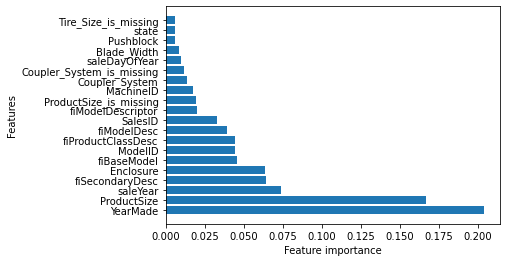

In [221]:
plot_features(X_train.columns, ideal_model.feature_importances_)

In [224]:
# Let'stry toinvert the graph so that the most important feature is on top
def plot_features(columns, importances, n=20):
    df_feat_imp = (pd.DataFrame({"features" : columns,
                               "features_importances" : importances}).sort_values("features_importances", ascending=False)
                  .reset_index(drop=True))
    # Plot the DataFrame
    fig, ax = plt.subplots()
    ax.barh(df_feat_imp["features"][:n], df_feat_imp["features_importances"][:n])
    ax.set_ylabel("Features")
    ax.set_xlabel("Feature importance")
    ax.invert_yaxis()

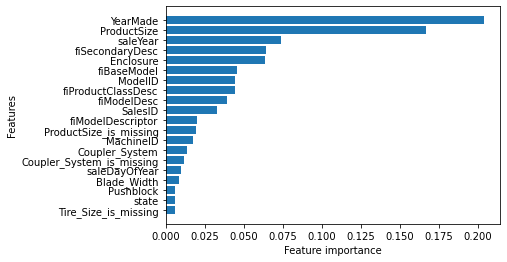

In [226]:
plot_features(X_train.columns, ideal_model.feature_importances_)

In [227]:
# So, the most important feature here is the year in which bulldozer is made
# Next very important feature is Product Size
df_tmp["ProductSize"].value_counts()

0    216605
4     64342
3     51297
6     27057
5     25721
2     21396
1      6280
Name: ProductSize, dtype: int64

In [230]:
# In the above output 0 signifies the values which were missing in the training data

In [231]:
# Let's try to check what rest of the values mean
df["ProductSize"].value_counts()

Medium            64342
Large / Medium    51297
Small             27057
Mini              25721
Large             21396
Compact            6280
Name: ProductSize, dtype: int64